# Titanic project

data: https://www.kaggle.com/competitions/titanic/data

### loading data

In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
data_list = [train_data,test_data]

###  Data exploration

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_style('whitegrid')

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


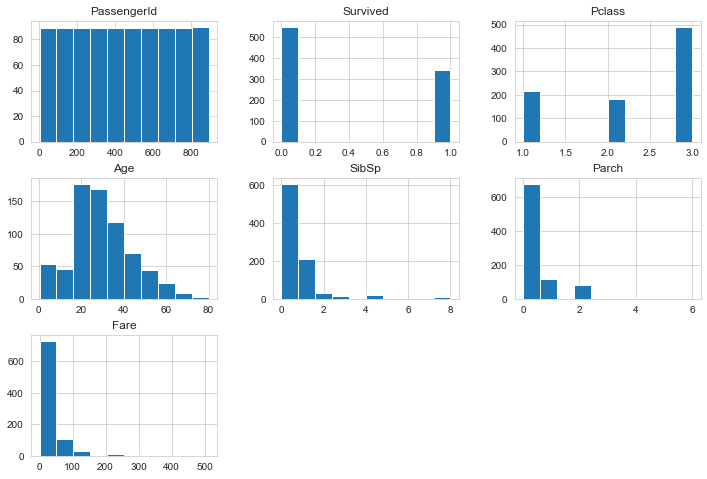

In [6]:
train_data.hist(figsize=(12,8))
plt.show()

0    549
1    342
Name: Survived, dtype: int64

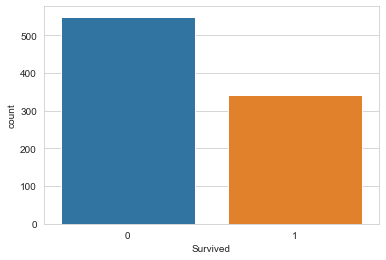

In [7]:
#balanced dataset?
sns.countplot(x="Survived",data=train_data)
train_data["Survived"].value_counts()

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##  Dealing With Null Values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

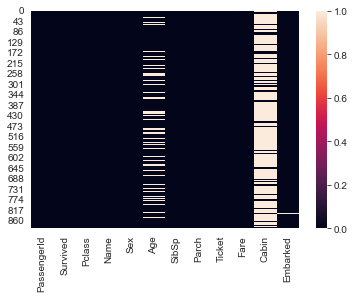

In [9]:
sns.heatmap(train_data.isna())
train_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

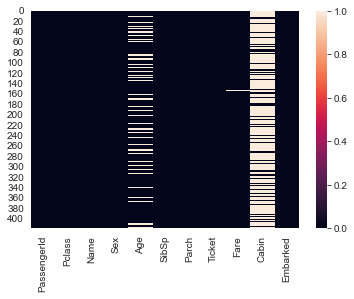

In [10]:
sns.heatmap(test_data.isna())
test_data.isnull().sum()

#### Filling missing value in "Fare" column with median of all tickets from same Pclass

In [11]:
test_data[test_data["Fare"].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [12]:
fill_value_fare = test_data[test_data["Pclass"]==3]["Fare"].median()

In [13]:
test_data["Fare"].fillna(fill_value_fare,inplace=True)

#### Filling missing values in "Embarked" column with the value that appears most often

In [14]:
fill_value_emb = train_data["Embarked"].dropna().mode()[0]

In [15]:
fill_value_emb

'S'

In [16]:
train_data["Embarked"].fillna(fill_value_emb,inplace=True)

#### Each row which has missing "Age" value is filled with median  calculated from observations which belongs to the same "Pclass" and "Sex"

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

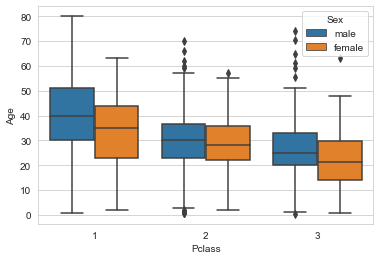

In [17]:
sns.boxplot(x="Pclass",y="Age",data=train_data,hue="Sex")    

In [18]:
data_list=[train_data,test_data]

In [19]:
for df in data_list:
    for sex in ["male","female"]:
        for cls in range(0,3): #Pclass
            age_med = df[(df["Sex"] == sex) & (df["Pclass"] == cls+1)]["Age"].dropna().median() #Age Median
            index_value = df[(df["Sex"] == sex) & (df["Pclass"] == cls+1) & (df["Age"].isna())].index
            if len(index_value) > 0:
                df.iloc[index_value,df.columns.get_loc("Age")] = int(age_med)
            

In [20]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## Feature engineering

In [21]:
#dropping columns which contain unique values
train_data.drop(["Cabin","PassengerId","Ticket"],inplace=True,axis=1)
test_data.drop(["Cabin","PassengerId","Ticket"],inplace=True,axis=1)
data_list = [train_data,test_data]

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


###  Getting title from name column 

In [23]:
train_data["Name"].str.extract("([A-Za-z]+)\.").value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Mme           1
Ms            1
Capt          1
Lady          1
Jonkheer      1
Don           1
Countess      1
Sir           1
dtype: int64

In [24]:
data_list = [train_data,test_data]

In [25]:
for df in data_list:
    df["Title"] = df["Name"].str.extract("([A-Za-z]+)\.")
    #Uniting rare values to one category called "Other"
    df.loc[~df["Title"].isin(["Mr","Miss","Mrs","Master"]),"Title"] = "Other"

In [29]:
train_data[["Title","Survived"]].groupby("Title").mean()

,Survived
Title,
Master,0.575000
Miss,0.697802
Mr,0.156673
Mrs,0.792000
Other,0.444444


### Encoding categorical variables

In [30]:
data_list = [train_data,test_data]
for df in data_list:
    for column in ["Sex","Embarked","Title"]:
        dummy_v = pd.get_dummies(df[column], drop_first=True)
        df[dummy_v.columns] = dummy_v

In [31]:
train_data.drop(["Sex","Embarked","Title","Name"], inplace=True,axis=1)
test_data.drop(["Sex","Embarked","Title","Name"], inplace=True,axis=1)

In [32]:
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Miss,Mr,Mrs,Other
0,0,3,22.0,1,0,7.2500,1,0,1,0,1,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1,0,0,0,1
887,1,1,19.0,0,0,30.0000,0,0,1,1,0,0,0
888,0,3,21.0,1,2,23.4500,0,0,1,1,0,0,0
889,1,1,26.0,0,0,30.0000,1,0,0,0,1,0,0


# Modeling

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [61]:
X = train_data.drop("Survived",axis=1)
y = train_data["Survived"]

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
col_names = ["Pclass","Age","SibSp","Parch","Fare"]

In [65]:
# Scaling metric variables (except dummy variables)
scaler = StandardScaler()
scaler.fit(X_train[col_names])
X_train_scaled = scaler.transform(X_train[col_names])
X_test_scaled = scaler.transform(X_test[col_names])
X_train[col_names] = X_train_scaled
X_test[col_names] = X_test_scaled

In [66]:
classifiers = {
    "LogisticRegression":LogisticRegression(),
    "SVM":SVC(),
    "Knn":KNeighborsClassifier(3),
    "RandomForest":RandomForestClassifier(),
    "NB":GaussianNB(),
}

In [67]:
#Selecting the best performing model
result_df = pd.DataFrame(columns=["Model","Accuracy"])
for key in classifiers:
    model = classifiers[key]
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test,predictions)
    result_df = result_df.append({"Model":key,"Accuracy":accuracy},ignore_index=True)

In [68]:
result_df

,Model,Accuracy
0,LogisticRegression,0.811659
1,SVM,0.820628
2,Knn,0.802691
3,RandomForest,0.802691
4,NB,0.744395


### Tuning the best performing model

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [71]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)

In [72]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=1)

In [73]:
predictions = grid.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
print(f"Support-vector machine accuracy {round(accuracy,4)}")

Support-vector machine accuracy 0.8251
